# Flood Prediction Machine Learning Model 

In [1]:
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Insights

#### Importing Required Libraries.

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('Flood-India.csv')
print(data)

                    SUBDIVISION  YEAR   JAN    FEB    MAR    APR    MAY  \
0     Andaman & Nicobar Islands  1901  49.2   87.1   29.2    2.3  528.8   
1     Andaman & Nicobar Islands  1902   0.0  159.8   12.2    0.0  446.1   
2     Andaman & Nicobar Islands  1903  12.7  144.0    0.0    1.0  235.1   
3     Andaman & Nicobar Islands  1904   9.4   14.7    0.0  202.4  304.5   
4     Andaman & Nicobar Islands  1905   1.3    0.0    3.3   26.9  279.5   
...                         ...   ...   ...    ...    ...    ...    ...   
4183                Lakshadweep  2013  26.2   34.4   37.5    5.3   88.3   
4184                Lakshadweep  2014  53.2   16.1    4.4   14.9   57.4   
4185                Lakshadweep  2015   2.2    0.5    3.7   87.1  133.1   
4186                Lakshadweep  2016  59.6   12.1    3.2    2.6   77.4   
4187                Lakshadweep  2017  21.3    0.9  100.2    1.8  145.7   

        JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL     JF    MAM  \
0     517.5  365.1  

In [4]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND,FLOODS
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,YES
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,YES
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,YES
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,YES
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,NO


In [5]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND,FLOODS
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6,YES
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5,YES
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4,NO
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4,YES
4187,Lakshadweep,2017,21.3,0.9,100.2,1.8,145.7,521.9,164.2,206.2,216.0,137.1,63.5,160.1,1738.9,22.2,247.8,1108.3,360.7,YES


# Finding number of missing values

In [6]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
FLOODS         0
dtype: int64

# Analyzing the Dataset

In [7]:
print(data.shape)

(4188, 20)


In [8]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000
mean,1959.220630,18.920248,21.583954,27.373639,43.030707,85.599499,229.842741,346.440019,289.465449,197.033644,95.165377,39.392693,18.923352,1400.699045,40.464924,155.486055,1061.311342,153.171681
std,33.717097,33.782049,35.723607,46.905790,68.131419,122.672590,234.286985,268.999721,188.548641,135.655991,99.188379,68.298783,43.012281,906.579304,59.271230,201.111789,707.729356,166.823080
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.675000,174.800000,155.475000,100.050000,14.500000,0.600000,0.100000,794.225000,4.000000,23.775000,571.825000,33.375000
50%,1959.000000,5.900000,6.500000,7.900000,15.400000,36.750000,138.700000,284.800000,258.300000,173.550000,64.900000,9.300000,3.000000,1117.500000,18.900000,74.400000,879.850000,97.150000
75%,1988.000000,22.000000,26.600000,31.300000,49.525000,97.725000,304.300000,418.400000,377.525000,265.825000,148.100000,45.000000,17.500000,1634.075000,50.100000,196.900000,1284.525000,211.350000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [9]:
data.info

<bound method DataFrame.info of                     SUBDIVISION  YEAR   JAN    FEB    MAR    APR    MAY  \
0     Andaman & Nicobar Islands  1901  49.2   87.1   29.2    2.3  528.8   
1     Andaman & Nicobar Islands  1902   0.0  159.8   12.2    0.0  446.1   
2     Andaman & Nicobar Islands  1903  12.7  144.0    0.0    1.0  235.1   
3     Andaman & Nicobar Islands  1904   9.4   14.7    0.0  202.4  304.5   
4     Andaman & Nicobar Islands  1905   1.3    0.0    3.3   26.9  279.5   
...                         ...   ...   ...    ...    ...    ...    ...   
4183                Lakshadweep  2013  26.2   34.4   37.5    5.3   88.3   
4184                Lakshadweep  2014  53.2   16.1    4.4   14.9   57.4   
4185                Lakshadweep  2015   2.2    0.5    3.7   87.1  133.1   
4186                Lakshadweep  2016  59.6   12.1    3.2    2.6   77.4   
4187                Lakshadweep  2017  21.3    0.9  100.2    1.8  145.7   

        JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL     J

In [10]:
data.cov()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
YEAR,1136.842641,-62.381469,-37.671572,35.284824,15.581783,11.033619,-104.445305,-143.145994,16.811542,-24.934198,1.662644,-60.895498,-19.766653,-173.561313,-98.736587,73.407114,-219.333432,-71.052862
JAN,-62.381469,1141.226836,547.637564,622.909462,479.465098,536.004820,-263.742707,-496.436953,66.779379,108.328466,39.638069,162.540456,329.578362,3058.597328,1687.966989,1631.408011,-624.949360,528.393901
FEB,-37.671572,547.637564,1276.176079,966.807786,895.346884,891.492447,278.905678,144.307674,490.686888,383.661703,-15.544026,-56.007999,196.931653,5625.758141,1823.519005,2743.395358,1220.452382,121.869302
MAR,35.284824,622.909462,966.807786,2200.153176,1783.012305,2093.171532,1807.646037,1206.599586,1203.877197,1139.369581,408.064470,28.162977,266.901884,13489.424513,1590.029787,6081.707633,5280.594137,702.857030
APR,15.581783,479.465098,895.346884,1783.012305,4641.890282,5433.224252,7182.591152,4834.798035,3280.903134,3520.345769,2476.145757,753.795371,370.364047,34424.935986,1375.231428,11806.237815,18554.374151,3577.846860
MAY,11.033619,536.004820,891.492447,2093.171532,5433.224252,15048.564234,16235.724437,10834.041869,7575.471370,8153.488679,6409.220429,2923.357775,1302.060950,75222.998863,1426.651349,22477.620619,42510.751496,10571.257055
JUN,-104.445305,-263.742707,278.905678,1807.646037,7182.591152,16235.724437,54890.391247,46540.399997,28940.038702,17538.473107,11346.413245,3651.629696,910.324129,184907.074314,11.920308,25032.986013,147201.924380,15845.807927
JUL,-143.145994,-496.436953,144.307674,1206.599586,4834.798035,10834.041869,46540.399997,72360.849714,34828.946984,18757.447999,7999.915148,784.823187,-231.054828,195372.084703,-343.357729,16636.360744,172682.387401,8498.708533
AUG,16.811542,66.779379,490.686888,1203.877197,3280.903134,7575.471370,28940.038702,34828.946984,35550.590158,12751.172983,4739.672835,246.009222,8.399907,127489.803733,563.573235,11988.935723,111956.808226,4937.033516
SEP,-24.934198,108.328466,383.661703,1139.369581,3520.345769,8153.488679,17538.473107,18757.447999,12751.172983,18402.547817,5197.418765,1436.706176,665.946850,86992.086846,493.722714,12706.002750,67479.318121,7286.369104


In [11]:
data.corr()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
YEAR,1.000000,-0.054767,-0.031276,0.022311,0.006783,0.002668,-0.013222,-0.015783,0.002644,-0.005451,0.000497,-0.026444,-0.013630,-0.005678,-0.049406,0.010826,-0.009192,-0.012632
JAN,-0.054767,1.000000,0.453787,0.393109,0.208316,0.129341,-0.033323,-0.054629,0.010484,0.023638,0.011829,0.070447,0.226819,0.099869,0.843013,0.240126,-0.026139,0.093760
FEB,-0.031276,0.453787,1.000000,0.576977,0.367865,0.203430,0.033324,0.015017,0.072849,0.079169,-0.004387,-0.022955,0.128164,0.173708,0.861214,0.381852,0.048272,0.020450
MAR,0.022311,0.393109,0.576977,1.000000,0.557931,0.363773,0.164490,0.095628,0.136123,0.179060,0.087708,0.008791,0.132292,0.317220,0.571919,0.644706,0.159070,0.089822
APR,0.006783,0.208316,0.367865,0.557931,1.000000,0.650074,0.449972,0.263803,0.255401,0.380889,0.366411,0.161992,0.126383,0.557340,0.340553,0.861641,0.384797,0.314788
MAY,0.002668,0.129341,0.203430,0.363773,0.650074,1.000000,0.564906,0.328315,0.327521,0.489956,0.526741,0.348916,0.246769,0.676390,0.196212,0.911098,0.489648,0.516563
JUN,-0.013222,-0.033323,0.033324,0.164490,0.449972,0.564906,1.000000,0.738465,0.655130,0.551829,0.488258,0.228205,0.090335,0.870562,0.000858,0.531284,0.887765,0.405425
JUL,-0.015783,-0.054629,0.015017,0.095628,0.263803,0.328315,0.738465,1.000000,0.686697,0.514023,0.299828,0.042718,-0.019970,0.801133,-0.021535,0.307517,0.907045,0.189385
AUG,0.002644,0.010484,0.072849,0.136123,0.255401,0.327521,0.655130,0.686697,1.000000,0.498526,0.253434,0.019104,0.001036,0.745841,0.050429,0.316169,0.838996,0.156959
SEP,-0.005451,0.023638,0.079169,0.179060,0.380889,0.489956,0.551829,0.514023,0.498526,1.000000,0.386267,0.155066,0.114132,0.707351,0.061404,0.465728,0.702853,0.321970


In [12]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [13]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND,FLOODS
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,1
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,1
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,1
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,1
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,0


In [14]:
x=data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7


In [15]:
y=data.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       0
       ..
4183    1
4184    1
4185    0
4186    1
4187    1
Name: FLOODS, Length: 4188, dtype: int64

# Plotting the Data


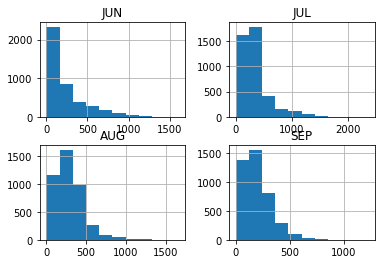

In [16]:
import matplotlib.pyplot as plt    
%matplotlib inline                   
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

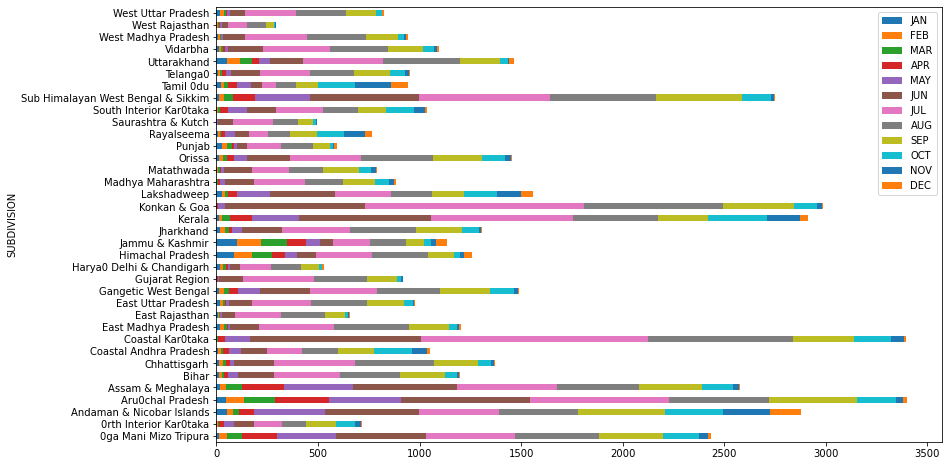

In [58]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));
plt.show()

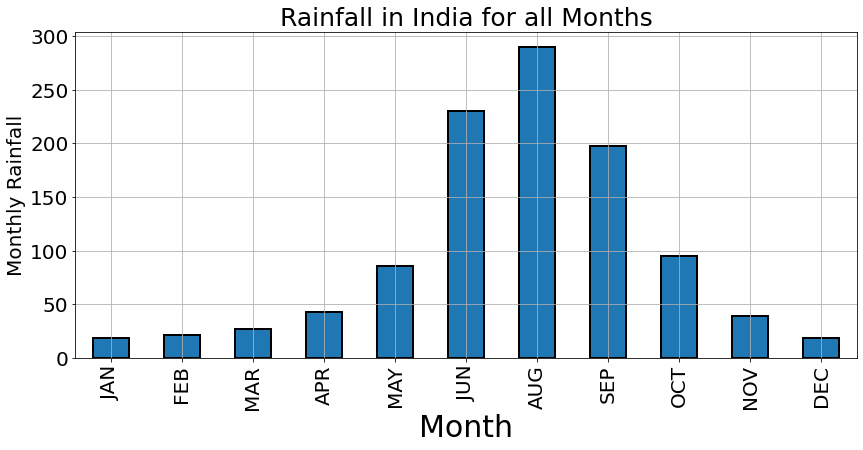

In [17]:
ax = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in India for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

# Using sklearn to develop the ML Model

In [18]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.08428987, 0.21586121, ..., 0.40968048, 0.860225  ,
        0.05441296],
       [0.00862069, 0.        , 0.3960347 , ..., 0.20795107, 0.55324395,
        0.25991903],
       [0.01724138, 0.02175775, 0.35687732, ..., 0.19107877, 0.43828017,
        0.36437247],
       ...,
       [0.98275862, 0.00376906, 0.00123916, ..., 0.17441738, 0.35598706,
        0.25748988],
       [0.99137931, 0.10210725, 0.02998761, ..., 0.06179479, 0.04931422,
        0.12097166],
       [1.        , 0.03649135, 0.00223048, ..., 0.1445745 , 0.09785791,
        0.25927126]])

In [19]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
376,1949,8.1,12.6,67.4,370.2,419.6,562.8,507.7,416.9,427.5,177.3,4.2,2.0
1136,2007,0.1,46.6,25.8,3.2,28.3,64.5,265.2,180.4,111.5,14.6,0.0,1.1
4036,1982,0.7,0.1,21.9,60.4,148.2,612.2,511.5,495.0,70.6,164.4,127.5,10.8
104,2010,101.7,8.0,0.7,12.5,319.0,448.9,521.9,563.8,263.3,402.4,268.5,246.4
1814,1983,118.8,97.2,318.8,207.8,108.8,67.1,154.0,222.1,115.1,39.7,14.6,21.2


In [20]:
x_train.dtypes

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object

In [21]:
x_test.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
3624,1921,13.0,0.0,3.5,62.4,18.6,699.4,871.9,841.6,327.1,128.6,41.3,0.0
344,1917,1.3,81.8,25.6,289.1,121.7,356.6,387.3,375.8,371.7,147.9,63.3,0.1
1014,2002,13.4,11.3,2.2,25.0,74.8,116.6,386.1,247.7,192.8,33.8,1.4,0.7
1588,1991,0.1,39.8,16.0,34.8,10.8,73.5,86.8,144.3,41.7,1.0,0.2,26.8
2887,2003,2.1,1.3,2.3,4.9,28.5,117.6,255.9,183.9,95.7,22.1,4.9,0.8


In [22]:
y_train=y_train.astype('int')
y_train

376     1
1136    0
4036    1
104     1
1814    1
       ..
2360    0
3163    0
1761    0
1636    0
2945    0
Name: FLOODS, Length: 3350, dtype: int32

In [23]:
y_test=y_test.astype('int')
y_test

3624    1
344     1
1014    0
1588    1
2887    1
       ..
1088    0
2358    1
1539    0
2714    1
292     1
Name: FLOODS, Length: 838, dtype: int32

# Using Prediction Algorithms:

## KNN classifier to predict

In [24]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
print("Predicted Values for the Floods:")
y_predict=clf.predict(x_test)
y_predict

Predicted Values for the Floods:


array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,

In [26]:
print("Actual Values for the Floods:")
print(y_test)

Actual Values for the Floods:
3624    1
344     1
1014    0
1588    1
2887    1
       ..
1088    0
2358    1
1539    0
2714    1
292     1
Name: FLOODS, Length: 838, dtype: int32


In [27]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1
 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0
 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1
 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1
 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0
 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0

In [28]:
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std= minmax.fit_transform(x_train)
x_test_std= minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [29]:
knn_acc

array([0.53357207, 0.5470009 , 0.54121864])

In [30]:
knn_proba

array([[0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       ...,
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6]])

### How accurate is our model?

In [31]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:50.835322
Recall Score:53.318078
ROC score:50.723877
[[193 208]
 [204 233]]


## Logistic Regression to predict

In [32]:
x_train_std=minmax.fit_transform(x_train)
y_train_std=minmax.transform(x_test)

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

In [33]:
lr_acc

array([0.55774396, 0.55326768, 0.55286738])

In [34]:
lr_proba

array([[0.48590854, 0.51409146],
       [0.43091599, 0.56908401],
       [0.49903199, 0.50096801],
       ...,
       [0.61609126, 0.38390874],
       [0.56986392, 0.43013608],
       [0.53873624, 0.46126376]])

In [35]:
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [36]:
print(y_test.values)

[1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 0 

In [37]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1
 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1
 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1

### Accuracy and Efficiency of our Model 

In [38]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:45.465394
recall score:57.894737
roc score:44.907468
[[128 273]
 [184 253]]


## Support Vector Classification to predict

In [39]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [40]:
svc_acc

array([0.59803044, 0.5747538 , 0.58512545])

In [41]:
svc_proba

array([[0.33404564, 0.66595436],
       [0.38427602, 0.61572398],
       [0.55658101, 0.44341899],
       ...,
       [0.59831973, 0.40168027],
       [0.62245182, 0.37754818],
       [0.54456387, 0.45543613]])

In [42]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.66595436, 0.61572398, 0.44341899, ..., 0.40168027, 0.37754818,
       0.45543613])

In [43]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1
 0 0

In [44]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1
 

### Accuracy of our model

In [45]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:49.284010
recall score:31.350114
roc score:50.089022
[[276 125]
 [300 137]]


# Decision Tree Classification to Predict

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.5308863, 0.5129812, 0.5188172])

In [47]:
print("Predicted Values:")
y_pred=dtc_clf.predict(x_test)
y_pred

Predicted Values:


array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [48]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1
 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0
 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1
 0 0 1 1 1

### Printing the Accuracy

In [49]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:51.073986
recall score:50.343249
roc score:51.106787
[[208 193]
 [217 220]]


# Random Forest Classifier to predict

In [50]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [51]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [52]:
rmf_clf_acc

array([0.57743957, 0.55505819, 0.56810036])

In [53]:
rmf_proba

array([[0.50728471, 0.49271529],
       [0.45826871, 0.54173129],
       [0.47764936, 0.52235064],
       ...,
       [0.56279969, 0.43720031],
       [0.56776971, 0.43223029],
       [0.55538496, 0.44461504]])

In [54]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:51.073986
recall score:50.343249
roc score:51.106787
[[208 193]
 [217 220]]


# Final Accuracy of our Models 

### Comparing all the prediction models

In [55]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

,Name,Score
0,KNN,0.508353
1,LR,0.454654
2,SVC,0.492840
3,DT,0.513126
4,RF,0.550119


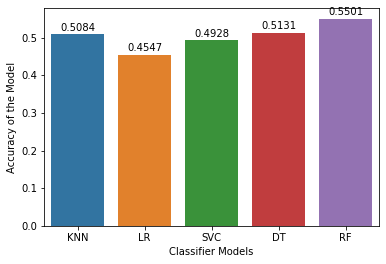

In [56]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [57]:
tr_split['Score'].max() 

0.5501193317422435